# Polynomial Regression

## A linear graph of averages 
Recall the graph of averages from the Simple Regression notebook.

In [1]:
%pylab inline
import pandas as pd
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


In [2]:
HW=pd.read_csv('data/HW25000.csv')
HW=HW.iloc[:,1:]
HW.columns=['Height','Weight']
HW.head()

,Height,Weight
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [3]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['Weight'])

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print('w1=',w1)
def f(x,w):
    return w[0]+w[1]*x

w1= [-82.57574306   3.08347645]


/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


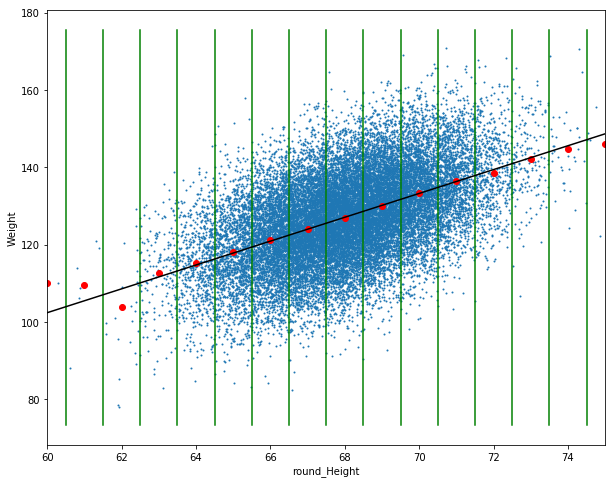

In [4]:
def Average_Plot(df,x_name,y_name):
    # calculate the mean weight for each 1-inch interval of height.
    df['round_'+x_name]=df[x_name].round()

    per_height_means=df.groupby('round_'+x_name).mean()[[y_name]]

    ax=df.plot(kind='scatter',s=1,x=x_name,y=y_name,figsize=[10,8]);
    per_height_means.plot(y=y_name,style='ro',ax=ax,legend=False)

    _xlim=xlim()
    _ylim=ylim()
    for _x in arange(_xlim[0]+0.5,_xlim[1],1):
        ax.plot([_x,_x],[_ylim[0],_ylim[1]],'g')
    return ax
ax=Average_Plot(HW,'Height','Weight');
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

## non-linear graph of averages
Suppose we have data for which the averages do not fall close to a straight line.

In [5]:
HW['P2']=HW['Weight']+(HW['Height']-68)**2

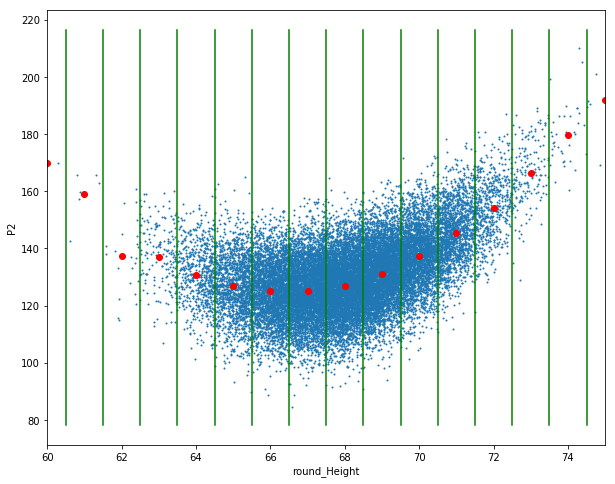

In [6]:
ax=Average_Plot(HW,'Height','P2');

### The limits of linear regression
We **can** use linear regression for this data, but the fit will be poor.

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


w1= [-77.29147795   3.05894484]


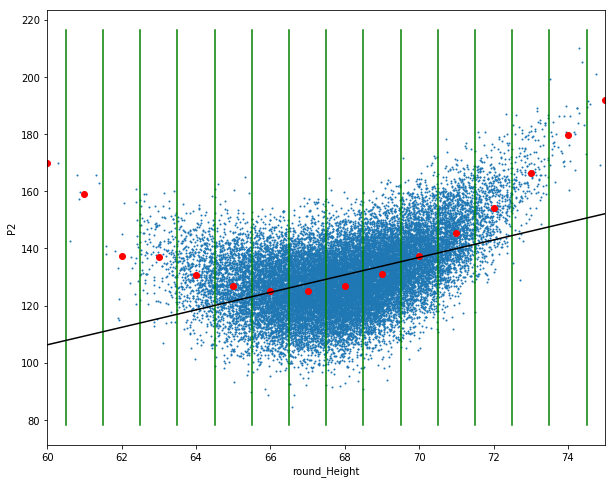

In [7]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A])
y=np.array(HW['P2'])

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print('w1=',w1)
def f(x,w):
    return w[0]+w[1]*x
ax=Average_Plot(HW,'Height','P2');
x0,x1=plt.xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'k');

### Lets try a second degree polynomial

A second degree polynomial can be expressed in the form 
$$f_2(x)=w_0+w_1 x + w_2 x^2 $$

We find the parameters $w_0,w_1,w_2$ that minimize the root-mean-square error.

In [8]:
A=np.array(HW['Height'])
A=np.array([ones(len(A)),A,A**2])
y=np.array(HW['P2'])

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print('w2=',w2)
def f2(x,w):
    return w[0]+w[1]*x+w[2]*x**2

w2= [ 4.57718628e+03 -1.33969361e+02  1.00774285e+00]


/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


### The second degree polynomial is a pretty good fit

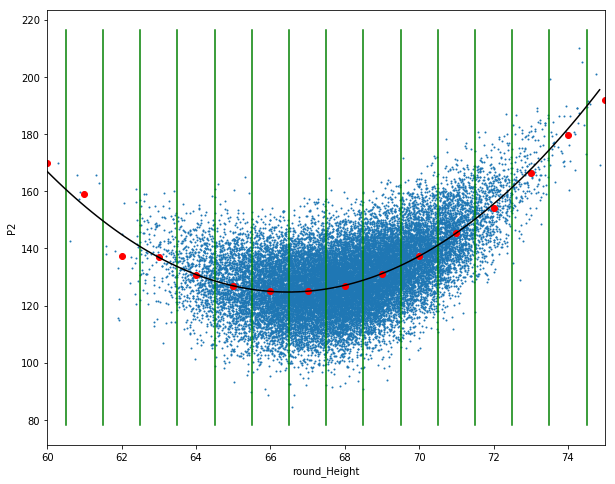

In [9]:
ax=Average_Plot(HW,'Height','P2')
_xmin,_xmax=xlim()
_xrange=_xmax-_xmin
X=arange(_xmin,_xmax,_xrange/100.)
Y=f2(X,w2)
ax.plot(X,f2(X,w2),'k');

## Over-fitting, Under-fitting and Model selection
Often we are given data an we don't know what degree polynomial 

In [10]:
# A function for computing a polynomial of an arbitrary degree
# The degree is determined by the length of the parameter vector w
def F(X,w):
    Accum=w[0]*np.ones(len(X))
    for i in range(1,len(w)):
        Accum+=w[i]*X**i
    return Accum
        

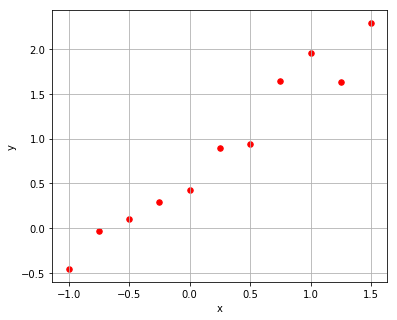

In [11]:
np.random.seed(0)
X=np.arange(-1,1.6,0.25)
Y=X+np.random.rand(len(X))
Y

Data=pd.DataFrame({'x':X,
                   'y':Y})
ax=Data.plot(kind='scatter',s=30,c='r',x='x',y='y',figsize=[6,5]);
grid()

In [12]:
L=len(X)
split=[0,1]*L
Data['split']=split[:L]

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


(0.04129876638352148, 0.519905344002559)

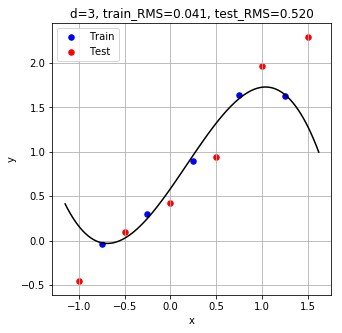

In [13]:
def polyfit(ax,d=8):
    Train=Data[Data['split']==1]
    Test=Data[Data['split']==0]
    
    A=np.array([Train['x']])
    D=np.ones([1,A.shape[1]])
    for i in range(1,d+1):
        D=np.concatenate([D,A**i])
    w=linalg.lstsq(D.T,Train['y'])[0]
    train_RMS=sqrt(mean((Train['y']-F(Train['x'],w))**2))
    test_RMS=sqrt(mean((Test['y']-F(Test['x'],w))**2))

    Train.plot(kind='scatter',s=30,c='b',x='x',y='y',ax=ax,label='Train');
    Test.plot(kind='scatter',s=30,c='r',x='x',y='y',ax=ax,label='Test');
    grid()
    legend()
    _xmin,_xmax=plt.xlim()
    _xrange=_xmax-_xmin
    X=arange(_xmin,_xmax,_xrange/100.)
    ax.plot(X,F(X,w),'k');
    plt.title('d=%d, train_RMS=%5.3f, test_RMS=%5.3f'%(d,train_RMS,test_RMS))
    return train_RMS,test_RMS
fig=plt.figure(figsize=[5,5])
ax=plt.subplot(111)
polyfit(ax,3)

/Users/roepkeb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


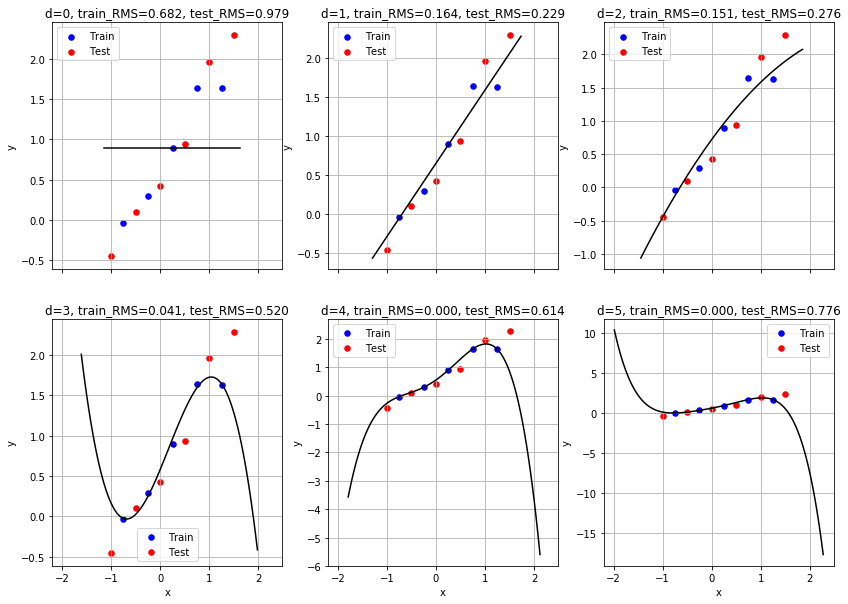

In [14]:
rows=2; cols=3; max_d=6
fig=plt.figure(figsize=[14,10])
train_RMS=np.zeros(max_d)
test_RMS=np.zeros(max_d)
for d in range(max_d):
    if d==0:
        ax=plt.subplot(rows,cols,d+1)
        ax0=ax
    else:
        ax=plt.subplot(rows,cols,d+1,sharex=ax0)
    train_RMS[d],test_RMS[d]=polyfit(ax,d)

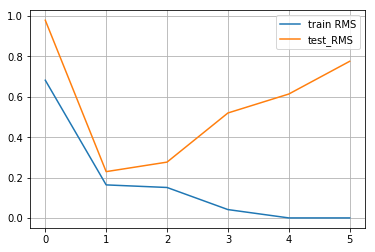

In [15]:
plot(train_RMS,label='train RMS')
plot(test_RMS,label='test_RMS')
legend()
grid()